<a href="https://colab.research.google.com/github/amulyabodempudi/amulya_INFO5731_Fall2023/blob/main/Amulya_Bodempudi_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here
import requests, csv
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint

url = "https://www.imdb.com/title/tt10366206/reviews?ref_=tt_urv"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

imdb_reviews=[]
right_table=soup.find('div', {'class':"lister"})
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
  imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())
pprint(imdb_reviews)


['Imagine a video game where you are shooting bad guys. Your hardware is old '
 'so everything is kind of slow and out of focus. The opponents are set to '
 'Easy and you installed a hack to give you invincibility and autoaim. And '
 'they come at you slowly, shouting, out in the open, with weapons that fire '
 'three or four bullets before they run out and they can shoot anything '
 "anyway. They use no snipers, no explosives, no traps of any kind. They can't "
 "even hit you when they're next to you and wielding a knife. And you try to "
 'fight them in a decent manner, yet your avatar moves like a 60 year old man '
 'and even with the autoaim you still suck. And if you somehow get into the '
 'many separate levels where nothing make sense, you get a big cinematic that '
 'takes you out of it. And because the cinematic is in 4k or whatever, it '
 'feels like slow motion.That, my friends, is the experience of watching JW4. '
 'The style that people have applauded in the first movie ha

In [3]:
df = pd.DataFrame({'reviews': imdb_reviews})
df.to_csv('reviews.csv')
df.head()

,reviews
0,Imagine a video game where you are shooting ba...
1,These John Wick movies can be sort of fun in t...
2,I went to the cinema with great expectations. ...
3,What is all the raving about with this movie? ...
4,"Very much over rated. Repetitive, tiring and i..."


In [4]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import os
import subprocess

# Function to install Java
def install_java():
    # Install openjdk-8-jdk-headless
    subprocess.run(["apt-get", "update"])
    subprocess.run(["apt-get", "install", "-y", "openjdk-8-jdk-headless", "-qq"])

    # Set the JAVA_HOME environment variable
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

    # Verify the Java installation
    java_version = subprocess.check_output(["java", "-version"], stderr=subprocess.STDOUT, text=True)
    print(java_version)

# Install Java
install_java()

# Install the pyLDAvis package
!pip install pyLDAvis

!pip install fastapi kaleido python-multipart uvicorn


openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)

  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [6]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

rev_data = df['reviews'].values.tolist()
rev_data_words = list(sent_to_words(rev_data))
rev_data_words = remove_stopwords(rev_data_words)
print(rev_data_words[:1])

[['imagine', 'video', 'game', 'shooting', 'bad', 'guys', 'hardware', 'old', 'everything', 'kind', 'slow', 'focus', 'opponents', 'set', 'easy', 'installed', 'hack', 'give', 'invincibility', 'autoaim', 'come', 'slowly', 'shouting', 'open', 'weapons', 'fire', 'three', 'four', 'bullets', 'run', 'shoot', 'anything', 'anyway', 'snipers', 'explosives', 'traps', 'kind', 'even', 'hit', 'next', 'wielding', 'knife', 'try', 'fight', 'decent', 'manner', 'yet', 'avatar', 'moves', 'like', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'many', 'separate', 'levels', 'nothing', 'make', 'sense', 'get', 'big', 'cinematic', 'takes', 'cinematic', 'whatever', 'feels', 'like', 'slow', 'motion', 'friends', 'experience', 'watching', 'jw', 'style', 'people', 'applauded', 'first', 'movie', 'turned', 'demented', 'caricature', 'fight', 'scenes', 'ridiculously', 'bad', 'actions', 'characters', 'make', 'sense', 'world', 'described', 'makes', 'sense', 'even', 'tongue', 'cheek', 'references

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(rev_data_words)

data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['imagine', 'video', 'game', 'shoot', 'bad', 'guy', 'hardware', 'old', 'kind', 'slow', 'focus', 'opponent', 'set', 'easy', 'instal', 'hack', 'give', 'invincibility', 'autoaim', 'come', 'slowly', 'shout', 'open', 'weapon', 'fire', 'bullet', 'run', 'shoot', 'anyway', 'sniper', 'explosive', 'trap', 'kind', 'even', 'hit', 'next', 'wield', 'knife', 'try', 'fight', 'decent', 'manner', 'avatar', 'move', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'many', 'separate', 'level', 'make', 'sense', 'get', 'big', 'cinematic', 'take', 'cinematic', 'feel', 'slow', 'motion', 'friend', 'experience', 'watch', 'style', 'people', 'applaud', 'first', 'movie', 'turn', 'demented', 'caricature', 'fight', 'scene', 'ridiculously', 'bad', 'action', 'character', 'make', 'sense', 'world', 'describe', 'make', 'sense', 'even', 'tongue', 'cheek', 'reference', 'matrix', 'hit', 'know', 'enjoy', 'film', 'make', 'feel', 'old', 'film', 'hour', 'irrelevance', 'people', 'understand', 'rate', '

In [10]:
review_id2word = corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 2), (27, 2), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 3), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]]


[[('action', 1),
  ('anyway', 1),
  ('applaud', 1),
  ('autoaim', 2),
  ('avatar', 1),
  ('bad', 3),
  ('big', 1),
  ('boring', 1),
  ('bottom', 1),
  ('bullet', 1),
  ('caricature', 1),
  ('character', 1),
  ('cheek', 1),
  ('cinematic', 2),
  ('come', 1),
  ('credit', 1),
  ('decent', 1),
  ('demented', 1),
  ('describe', 1),
  ('destroy', 1),
  ('easy', 1),
  ('end', 1),
  ('enjoy', 1),
  ('even', 4),
  ('experience', 1),
  ('explosive', 1),
  ('feel', 2),
  ('fight', 2),
  ('film', 3),
  ('fire', 1),
  ('first', 1),
  ('focus', 1),
  ('friend', 1),
  ('funny', 1),
  ('game', 1),
  ('get', 2),
  ('give', 1),
  ('guy', 1),
  ('hack', 1),
  ('hardware', 1),
  ('hit', 2),
  ('hour', 1),
  ('imagine', 2),
  ('instal', 1),
  ('invincibility', 1),
  ('irrelevance', 1),
  ('joy', 1),
  ('keep', 1),
  ('kind', 2),
  ('knife', 1),
  ('know', 1),
  ('level', 1),
  ('line', 1),
  ('little', 1),
  ('make', 4),
  ('man', 1),
  ('manner', 1),
  ('many', 2),
  ('matrix', 1),
  ('motion', 1),
  ('m

In [11]:
review_id2word[0]

'action'

In [12]:
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[review_corpus]

[(0,
  '0.002*"people" + 0.002*"bad" + 0.002*"even" + 0.002*"watch" + 0.002*"make" '
  '+ 0.002*"fight" + 0.002*"hit" + 0.002*"cinematic" + 0.002*"film" + '
  '0.002*"shoot"'),
 (1,
  '0.038*"action" + 0.027*"also" + 0.016*"wick" + 0.016*"film" + 0.016*"see" + '
  '0.016*"well" + 0.016*"genre" + 0.016*"story" + 0.016*"reeve" + '
  '0.011*"movie"'),
 (2,
  '0.002*"movie" + 0.002*"scene" + 0.002*"action" + 0.002*"time" + '
  '0.002*"feel" + 0.002*"fight" + 0.002*"shoot" + 0.002*"ledge" + 0.002*"foot" '
  '+ 0.002*"good"'),
 (3,
  '0.038*"long" + 0.026*"hour" + 0.026*"storyline" + 0.026*"usual" + '
  '0.026*"fight" + 0.026*"head" + 0.013*"idea" + 0.013*"movie" + 0.013*"scene" '
  '+ 0.013*"feel"'),
 (4,
  '0.045*"movie" + 0.037*"action" + 0.025*"scene" + 0.014*"time" + '
  '0.014*"good" + 0.013*"feel" + 0.012*"fight" + 0.011*"first" + 0.010*"see" + '
  '0.010*"second"'),
 (5,
  '0.027*"action" + 0.027*"movie" + 0.020*"scene" + 0.020*"get" + '
  '0.020*"character" + 0.020*"script" + 0.014*

In [13]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46125134222737996


In [14]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit + 1, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 20, 2  # Adjust the range as needed
model_list, coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

cohe_val = []
for m, cv in zip(range(start, limit + 1, step), coherence_values):
    cohe_val.append(round(cv, 4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2878
Num Topics = 4  has Coherence Value of 0.3933
Num Topics = 6  has Coherence Value of 0.347
Num Topics = 8  has Coherence Value of 0.3874
Num Topics = 10  has Coherence Value of 0.3827
Num Topics = 12  has Coherence Value of 0.4168
Num Topics = 14  has Coherence Value of 0.5221
Num Topics = 16  has Coherence Value of 0.4675
Num Topics = 18  has Coherence Value of 0.4619
Num Topics = 20  has Coherence Value of 0.4613


In [15]:
sum(cohe_val)/len(cohe_val)

0.41278

In [16]:
optimal_model = model_list[2] # getting the topics=6 model, which is in 2nd index of our model and getting the 6 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.002*"movie" + 0.002*"fight" + 0.002*"scene" + 0.002*"action" + '
  '0.002*"time" + 0.002*"get" + 0.002*"watch" + 0.002*"good" + 0.002*"people" '
  '+ 0.002*"else"'),
 (1,
  '0.024*"action" + 0.019*"movie" + 0.014*"wick" + 0.014*"franchise" + '
  '0.014*"well" + 0.012*"also" + 0.010*"get" + 0.010*"really" + 0.008*"film" + '
  '0.008*"even"'),
 (2,
  '0.014*"movie" + 0.014*"watch" + 0.014*"people" + 0.014*"bad" + 0.013*"make" '
  '+ 0.013*"even" + 0.011*"fight" + 0.011*"shoot" + 0.011*"scene" + '
  '0.011*"slow"'),
 (3,
  '0.017*"fight" + 0.013*"action" + 0.013*"also" + 0.013*"get" + 0.013*"great" '
  '+ 0.013*"long" + 0.009*"scene" + 0.009*"well" + 0.009*"franchise" + '
  '0.009*"watch"'),
 (4,
  '0.035*"movie" + 0.027*"action" + 0.017*"scene" + 0.011*"time" + '
  '0.010*"much" + 0.010*"good" + 0.010*"see" + 0.010*"fight" + 0.010*"feel" + '
  '0.008*"say"'),
 (5,
  '0.019*"get" + 0.015*"action" + 0.015*"scene" + 0.015*"movie" + 0.015*"time" '
  '+ 0.012*"script" + 0.012*"chara































## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [17]:
# Write your code here
from gensim.models import LsiModel

lsamodel = LsiModel(review_corpus, num_topics=10, id2word = review_id2word)
print(lsamodel.print_topics(num_topics=10, num_words=10))


[(0, '0.488*"action" + 0.404*"movie" + 0.265*"scene" + 0.188*"time" + 0.174*"fight" + 0.166*"feel" + 0.144*"get" + 0.134*"also" + 0.134*"many" + 0.129*"see"'), (1, '0.212*"wick" + 0.211*"film" + 0.204*"also" + 0.199*"reeve" + 0.180*"story" + 0.170*"well" + 0.159*"franchise" + 0.147*"get" + 0.145*"make" + 0.135*"genre"'), (2, '0.290*"action" + -0.225*"people" + -0.208*"bad" + -0.206*"make" + -0.187*"sense" + -0.175*"watch" + -0.167*"even" + 0.167*"also" + -0.160*"old" + -0.127*"first"'), (3, '0.394*"movie" + 0.226*"first" + -0.185*"make" + 0.175*"good" + -0.170*"even" + -0.158*"action" + 0.135*"go" + 0.126*"massively" + -0.117*"many" + -0.117*"old"'), (4, '0.220*"much" + -0.195*"really" + 0.158*"lot" + -0.146*"know" + -0.144*"franchise" + -0.142*"show" + 0.142*"say" + 0.141*"hour" + -0.136*"great" + 0.135*"movie"'), (5, '0.192*"much" + 0.171*"lot" + -0.166*"film" + 0.164*"stunt" + 0.152*"chapter" + 0.137*"hour" + 0.136*"really" + 0.136*"move" + -0.130*"massively" + 0.126*"choreography"'

In [18]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(lsamodel)
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step=2, 20, 2
model_lsa, coherence_values = compute_lsa_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.2276
Topic no = 4  it's Coherence Value is 0.4182
Topic no = 6  it's Coherence Value is 0.4174
Topic no = 8  it's Coherence Value is 0.4189
Topic no = 10  it's Coherence Value is 0.4795
Topic no = 12  it's Coherence Value is 0.6057
Topic no = 14  it's Coherence Value is 0.5131
Topic no = 16  it's Coherence Value is 0.539
Topic no = 18  it's Coherence Value is 0.5788


In [19]:
coherencemodel = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
print(coherencemodel.get_coherence())

0.541025794778963


In [20]:
coherence_values_all

[0.2276, 0.4182, 0.4174, 0.4189, 0.4795, 0.6057, 0.5131, 0.539, 0.5788]

In [21]:
#sum(coherence_values_all)/len(coherence_values_all)

average_coherence = sum(coherence_values_all) / len(coherence_values_all)
print("Average Coherence Value:", average_coherence)


Average Coherence Value: 0.46646666666666675


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [22]:
# Write your code here

nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [23]:
top_valu = 10
top_topwords = {}
for j, topic_to_word in enumerate(df.reviews.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_valu]
    msg = 'Topic %i '  % j
    top_words = [df.reviews.tolist()[i].strip()[:35] for i in top]
    msg += 'has stop words '.join(top_words)
    print (msg)
    top_topwords[j] = top_words

Topic 0 Imagine a video game where you are 
Topic 1 Imagine a video game where you are 
Topic 2 Imagine a video game where you are 
Topic 3 Imagine a video game where you are 
Topic 4 Imagine a video game where you are 
Topic 5 Imagine a video game where you are 
Topic 6 Imagine a video game where you are 
Topic 7 Imagine a video game where you are 
Topic 8 Imagine a video game where you are 
Topic 9 Imagine a video game where you are 
Topic 10 Imagine a video game where you are 
Topic 11 Imagine a video game where you are 
Topic 12 Imagine a video game where you are 
Topic 13 Imagine a video game where you are 


<BarContainer object of 20 artists>

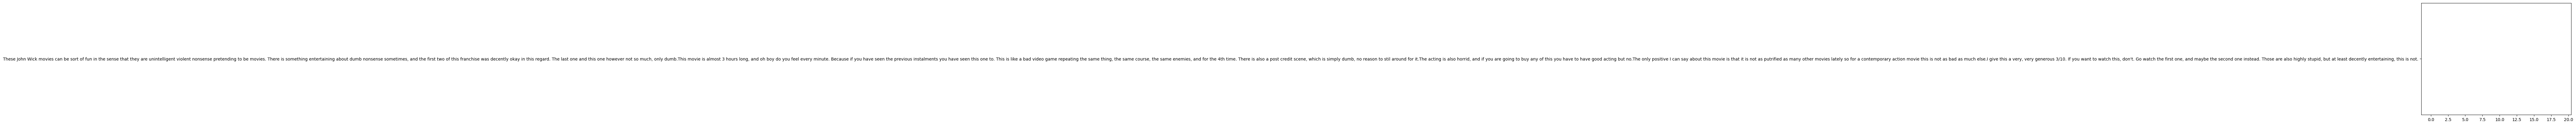

In [24]:
plt.bar(np.arange(20), df.reviews.tolist()[1])


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [25]:
# Write your code here
!pip install bertopic

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [26]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.reviews.tolist())
freq = topic_model.get_topic_info();
freq.head(5)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-06 01:19:08,757 - BERTopic - Transformed documents to Embeddings
2023-11-06 01:19:15,189 - BERTopic - Reduced dimensionality
2023-11-06 01:19:15,210 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,14,-1_the_and_is_of,"[the, and, is, of, to, this, it, was, that, ac...",[Stuntman turned writer/director Chad Stahelsk...


In [27]:
topic_model.get_topic(-1)


[('the', 0.16320279262892814),
 ('and', 0.11435451543022056),
 ('is', 0.08272095712147105),
 ('of', 0.07775213250527355),
 ('to', 0.07674185663163435),
 ('this', 0.07160226241674439),
 ('it', 0.05971436865625618),
 ('was', 0.05516187455783028),
 ('that', 0.05165420768116337),
 ('action', 0.05165420768116337)]

In [28]:
topic_model.visualize_term_rank()

In [29]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

Analyzing the performance of four topic modeling algorithms—LDA, LSA, lda2vec, and BERT 2-topic variant—entails comparing the outcomes based on a number of variables. The particular objectives and features of the dataset determine which "better" algorithm to choose.

Latent Dirichlet Allocation (LDA) is a popular and easily comprehensible topic modeling method. It works well when you need issues represented in a way that is understandable and straightforward. Because of its transparency and ease of use, LDA is useful in situations where topic content comprehension is essential.

Latent Semantic Analysis (LSA): LSA may not yield as interpretable subjects as LDA, but it is more successful in capturing semantic correlations between words. It is helpful for dimensionality reduction, information retrieval, and document similarity. LSA may be a wise option if the objective is to capture underlying semantic structure.

lda2vec: This technique offers themes that are more comprehensible and instructive by combining the advantages of word embeddings and LDA. When you require more detailed topic representations, it is beneficial. If you want to strike a compromise between interpretability and recording complex topic relationships, this algorithm is a suitable option.

BERT 2-topic: Topic modeling based on BERT offers extremely coherent and context-aware topics. It performs best when contextual knowledge is crucial. Perhaps the 2-topic version is better for problems involving binary categorization. That might not be comprehensible for complicated subjects, though.

 I feel Bert 2-topic is better when compared with remaining algorithms as it is robust and supports topic modeling variations. It is also having many advantages such as as it favours hierarchial topic reduction and finds the number of topics. Ultimately, the decision should consider the trade-offs between interpretability, semantic richness, and the specific needs of the task.

